# *Яндекс ПРАКТИКУМ*

# **ПРОЕКТ: Проект для «Викишоп». Поиск токсичных комментариев**

# Выполнил: *Мирослав Г.*

# email:

# Дата: 07.2023

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-Регрессия" data-toc-modified-id="Логистическая-Регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая Регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Модель-LGBMClassifier" data-toc-modified-id="Модель-LGBMClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LGBMClassifier</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Таблица-выбора-оптимальной-модели" data-toc-modified-id="Таблица-выбора-оптимальной-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Таблица выбора оптимальной модели</a></span></li><li><span><a href="#Проверка-Модели-на-ТЕСТОВОЙ-выборке" data-toc-modified-id="Проверка-Модели-на-ТЕСТОВОЙ-выборке-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Проверка Модели на ТЕСТОВОЙ выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Модель-LGBMClassifier" data-toc-modified-id="Модель-LGBMClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель LGBMClassifier</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Константная модель</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [4]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: spacy in c:\users\motok\anaconda3\lib\site-packages (3.5.4)



In [5]:
%pip install "C:\\Users\\motok\\Downloads\\en_core_web_sm-3.5.0-py3-none-any.whl"

Processing c:\users\motok\downloads\en_core_web_sm-3.5.0-py3-none-any.whl
en-core-web-sm is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

import lightgbm as lgb
import spacy

import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

nltk.download('popular')

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm
tqdm.pandas()

import time
from time import time
from datetime import datetime

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\motok\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\motok\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\motok\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\motok\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\motok\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [7]:
try:
    df = pd.read_csv('xxxxxxxxxxxxxxxxx\toxic_comments.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [8]:
# Удалим ненужную колонку
df = df.drop('Unnamed: 0', axis=1).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [9]:
# Создадим корпус из текстов
corpus = list(df['text'])

In [10]:
# Лемматизируем текст
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def lemmatize_text(text):
    preprocessed_text = preprocess_text(text)
    doc = nlp(preprocessed_text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

In [11]:
# Проверим работу лемматизации
sentence = "The striped bats are hanging on their feet for best"
print(lemmatize_text(sentence))

the stripe bat be hang on their foot for good


In [12]:
%%time
# Отчистим текст от лишних символов
df['lemm_text'] = df['text'].progress_apply(lemmatize_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: total: 33min 51s
Wall time: 34min 22s


In [13]:
data = df.copy()
data.head(15)

,text,toxic,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edit make under my usernam...
1,D'aww! He matches this background colour I'm s...,0,daww he match this background colour I m seemi...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man I m really not try to edit war its jus...
3,"""\nMore\nI can't make any real suggestions on ...",0,more I can not make any real suggestion on i...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...
5,"""\n\nCongratulations from me as well, use the ...",0,congratulation from I as well use the tool w...
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker before you piss around on my work
7,Your vandalism to the Matt Shirvington article...,0,your vandalism to the matt shirvington article...
8,Sorry if the word 'nonsense' was offensive to ...,0,sorry if the word nonsense be offensive to you...
9,alignment on this subject and which are contra...,0,alignment on this subject and which be contrar...


In [14]:
# Посчитаем дисбалланс классов
class_frequency = data['toxic'].value_counts()
class_frequency

0    143106
1     16186
Name: toxic, dtype: int64

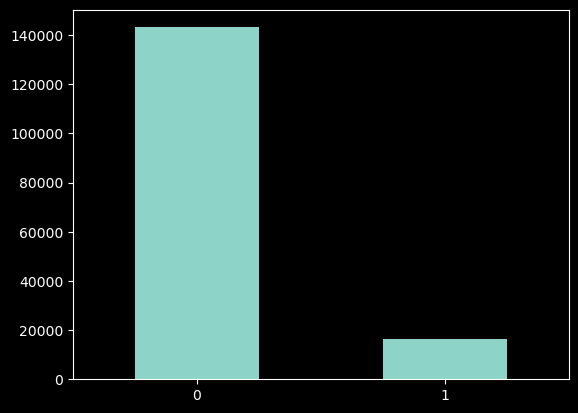

In [15]:
# Визуализируем дисбалланс классов
class_frequency.plot(kind='bar', rot=0);

In [16]:
# Разделим признаки на обучающие и тестовые
features_tr, features_tst, target_tr, target_tst = train_test_split(data['lemm_text'], data['toxic'], 
                                                                    test_size=.1, stratify=data['toxic'], random_state=0)

In [17]:
# объявим набор стоп-слов 
stopwords = set(stopwords.words('english'))

### Вывод:
Был предоставлен набор данных с разметкой о токсичности правок. Датасет состоял из трех колонок и 159292 строк. После загрузки, удалили ненужную колонку 'Unnamed: 0'. Провели лемматизацию и очистку текста.

В процессе работы выявили дисбалланс классов, получили обучающие и целевой признаки. Провели векторизацию текстов для обучения моделей.

## Обучение

Разработка Пайплайна.

Мы создаем конвейер, объединяющий векторизатор текстовых объектов с классификатором, который подходит для классификации текста.\
Используется векторизация методом TF-IDF 
(с перебором занчений N-грамм (рассматриваются биграммы и триграммы) - не использовал из-за сверхдолгого обучения.)\
Подбор параметров осуществляется методом перебора по сетке.\
Мы определяем сетку гиперпараметров для этого используем GridSearchCV, что позволяет изучить все возможные комбинации в сетке. Однако вычисление может занять очень продолжительное время. Поэтому используем только несколько параметров для перебора по сетке.

### Логистическая Регрессия

In [19]:
lr_clf_tfidf_pipe = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(stop_words=list(stopwords))),
    ('lr_clf', LogisticRegression(class_weight='balanced', n_jobs = -1, random_state=0))
])
                                
lr_clf_tfidf_params = {
                        #'tfidf_vectorizer__ngram_range': [(1, 2), (1, 3)],
                        'lr_clf__C': [ .1, 1, 10]
                        }

lr_clf_tfidf_search = GridSearchCV(lr_clf_tfidf_pipe, lr_clf_tfidf_params, cv=3, scoring='f1')

In [20]:
%%time

start = time()

lr_clf_tfidf_search.fit(features_tr, target_tr)

end = time()
time_learn_lr = round((end-start), 2) # время обучения

print(f'Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: {lr_clf_tfidf_search.best_score_:.2f}')
print('Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры: ', lr_clf_tfidf_search.best_params_)

Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: 0.77
Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры:  {'lr_clf__C': 10}
CPU times: total: 1min 11s
Wall time: 2min 5s


### Случайный лес

In [21]:
rf_clf_tfidf_pipe = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(stop_words=list(stopwords))),
    ('rf_clf', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0))
])
                                

rf_clf_tfidf_params = {
                        #'tfidf_vectorizer__ngram_range': [(1, 2), (1, 3)],
                        'rf_clf__n_estimators': [20, 50],
                        'rf_clf__max_depth': range(4, 8, 2),
                       }

rf_clf_tfidf_search = GridSearchCV(rf_clf_tfidf_pipe, rf_clf_tfidf_params, cv=3, scoring='f1')

In [22]:
# print(rf_clf_tfidf_search.get_params().keys())

In [23]:
%%time

start = time()

rf_clf_tfidf_search.fit(features_tr, target_tr)

end = time()
time_learn_rf = round((end-start), 2) # время обучения

print(f'Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: {rf_clf_tfidf_search.best_score_:.2f}')
print('Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры: ', rf_clf_tfidf_search.best_params_)

Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: 0.32
Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры:  {'rf_clf__max_depth': 4, 'rf_clf__n_estimators': 50}
CPU times: total: 1min 57s
Wall time: 1h 51min 13s


### Модель LGBMClassifier

In [24]:
gbm_clf_tfidf_pipe = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(stop_words=list(stopwords), dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)),
    ('gbm_clf', lgb.LGBMClassifier(class_weight='balanced', silent=True, device_type='gpu',  random_seed=0))
])

gbm_clf_tfidf_params = {
                        #'tfidf_vectorizer__ngram_range': [(1, 2), (1, 3)],
                        'gbm_clf__learning_rate': [0.1, 1],
                        'gbm_clf__n_estimators': [20, 50]
                        }

gbm_clf_tfidf_search = GridSearchCV(gbm_clf_tfidf_pipe, gbm_clf_tfidf_params, cv=3, scoring='f1')

In [25]:
# print(gbm_clf_tfidf_search.get_params().keys())

In [26]:
%%time

start = time()

gbm_clf_tfidf_search.fit(features_tr, target_tr)

end = time()
time_learn_gbm = round((end-start), 2) # время обучения

print(f'Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: {gbm_clf_tfidf_search.best_score_:.2f}')
print('Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры: ', gbm_clf_tfidf_search.best_params_)

Для LGBMClassifier, TfidfVectorizer и F1-score оптимальное значение метрики: 0.72
Для LogisticRegression и TfidfVectorizer оптимальные гиперпараметры:  {'gbm_clf__learning_rate': 0.1, 'gbm_clf__n_estimators': 50}
CPU times: total: 6min 30s
Wall time: 4min 43s


### Константная модель

In [27]:
dummy_clf_tfidf_pipe = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer(stop_words=list(stopwords))),
    ('dummy_clf', DummyClassifier(strategy='constant', constant=1, random_state=0))
])
                                
dummy_clf_tfidf_pipe.fit(features_tr, target_tr)
predicted_dummy = dummy_clf_tfidf_pipe.predict(features_tst)

print(f'Качество константной модели на ТЕСТОВОЙ выборке:\
____{round(f1_score(target_tst, predicted_dummy), 2)}')

Качество константной модели на ТЕСТОВОЙ выборке:____0.18


### Таблица выбора оптимальной модели

In [28]:
# напищем функцию для итоговой таблицы

def get_stat():
    df = pd.DataFrame(columns=['Модель', 'f1_score',  'Время_обуч_train'])
    return df

In [29]:
fin_tab = get_stat()
fin_tab.loc[len(fin_tab.index )] = ['LogisticRegression', round((lr_clf_tfidf_search.best_score_), 2),\
                                     time_learn_lr]
fin_tab.loc[len(fin_tab.index )] = ['RandomForestClassifier', round((rf_clf_tfidf_search.best_score_), 2),\
                                     time_learn_rf]
fin_tab.loc[len(fin_tab.index )] = ['LGBMClassifier', round((gbm_clf_tfidf_search.best_score_), 2),\
                                     time_learn_gbm]
display(fin_tab)

,Модель,f1_score,Время_обуч_train
0,LogisticRegression,0.77,125.58
1,RandomForestClassifier,0.32,6673.31
2,LGBMClassifier,0.72,283.67


*Из таблицы видно, что наибольшее значение f1 метрики у модели LogisticRegression. Поэтому качество модели LogisticRegression проверим на тестовой выборке.*

### Проверка Модели на ТЕСТОВОЙ выборке

In [30]:
best_model = lr_clf_tfidf_search.best_estimator_
predictions = best_model.predict(features_tst)

print(f'Качество модели на ТЕСТОВОЙ выборке: F1_score = {f1_score(target_tst, predictions):.2f}.')

Качество модели на ТЕСТОВОЙ выборке: F1_score = 0.76.


## Общий вывод

В задачу проекта входила разработка модели для классификации комментариев на позитивные и негативные. Модель должна выделять токсичные комментарии с точностью, определяемой метрикой качества - F1, не меньше 0.75.

Для исследования был предоставлен набор данных с разметкой о токсичности правок. Датасет состоял из трех колонок и 159292 строк. После загрузки, удалили ненужную колонку 'Unnamed: 0'. Провели лемматизацию и очистку текста.

В процессе работы выявили дисбалланс классов, получили обучающие и целевой признаки. Провели векторизацию текстов для обучения моделей.

Для обучения  выбрали 4 варианта моделей: 'LogisticRegression', 'RandomForestClassifier', 'LGBMClassifier', 'DummyClassifier'. Одна из моделей относится к моделям градиентного бустинга, и одна константная модель.

В результате исследования получили следующи данные:
- лучшее значение метрики f1_score при Обучении  показала модель LogisticRegression - 0,77
- лучшее время обучения показала модель LogisticRegression - 2 мин 16 сек

   Примечание: время обучения константной модели не учитывали!

Результат: Наилучьшая модель - LogisticRegression\
Значения метрики наилучшей модели:  f1_score - 0,76

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны